# Crypto Buy / Sell Prediction

I want to predict whether I should buy or sell at a certain price point for the Crypto currency SOLANA to hopefully be able to create something that will make me money

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import os

## Download the Dataset

In [5]:
#downloading the Solana dataset for the past 4 years
ticker_symbol = "SOL-USD"

# Define the period (past two years)
if not os.path.exists("./solana_prices2.csv"):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=4*365)

    # Fetch the historical data
    solana_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')

    # Display the data
    print(solana_data)

    # Save the data to a CSV file
    solana_data.to_csv("solana_prices.csv")

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-06-06    0.661071    0.661619    0.611781    0.622443    0.622443   
2020-06-07    0.622443    0.624444    0.593398    0.616578    0.616578   
2020-06-08    0.615078    0.679001    0.613310    0.668313    0.668313   
2020-06-09    0.667784    0.668088    0.627242    0.658002    0.658002   
2020-06-10    0.658038    0.670043    0.633404    0.644867    0.644867   
...                ...         ...         ...         ...         ...   
2024-05-31  166.976532  170.631561  163.933090  165.637711  165.637711   
2024-06-01  165.637726  167.737091  165.585617  166.030670  166.030670   
2024-06-02  166.029617  166.915482  161.653244  163.249908  163.249908   
2024-06-03  163.250153  167.038757  161.853714  164.923462  164.923462   
2024-06-04  164.925064  171.816818  164.515533  171.801926  171.801926   

                Volume  
Date        

Let's look at the data and try and organize it

In [6]:
df = pd.read_csv('./solana_prices.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1460 non-null   datetime64[ns]
 1   Open       1460 non-null   float64       
 2   High       1460 non-null   float64       
 3   Low        1460 non-null   float64       
 4   Close      1460 non-null   float64       
 5   Adj Close  1460 non-null   float64       
 6   Volume     1460 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.0 KB


In [7]:
#Making sure the date is in order
df.head()
df.sort_values(['Date'], ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume
1459,2024-06-04,164.925064,171.816818,164.515533,171.801926,171.801926,2057558426
1458,2024-06-03,163.250153,167.038757,161.853714,164.923462,164.923462,2182487608
1457,2024-06-02,166.029617,166.915482,161.653244,163.249908,163.249908,1562269041
1456,2024-06-01,165.637726,167.737091,165.585617,166.030670,166.030670,1058869941
1455,2024-05-31,166.976532,170.631561,163.933090,165.637711,165.637711,2415920333
...,...,...,...,...,...,...,...
4,2020-06-10,0.658038,0.670043,0.633404,0.644867,0.644867,1096203
3,2020-06-09,0.667784,0.668088,0.627242,0.658002,0.658002,988327
2,2020-06-08,0.615078,0.679001,0.613310,0.668313,0.668313,1440234
1,2020-06-07,0.622443,0.624444,0.593398,0.616578,0.616578,716785


## Data Wrangling & EDA

Let's try and label points within the Solana price points of where to buy and where to sell so we can classify if it is a good point to buy or if it is a good point to sell

In [9]:
#Using this function to create labels of when to buy and sell within the Solana price history, doing this so I can create a classification problem of identifying whether to buy or sell at a certain point for a stock

def create_dynamic_labels(data, min_days=5, max_days=30, threshold=0.05):
    """
    Creates labels based on future price changes over a dynamic range of days.
    
    Parameters:
    data (pd.DataFrame): DataFrame with 'Close' column.
    min_days (int): Minimum number of days to look into the future.
    max_days (int): Maximum number of days to look into the future.
    threshold (float): Threshold for price change to label 'buy', 'sell', or 'hold'.
    
    Returns:
    pd.DataFrame: DataFrame with 'Label' column.
    """
    # Ensure the DataFrame has a 'Close' column
    if 'Close' not in data.columns:
        raise ValueError("DataFrame must contain a 'Close' column")
    
    # Initialize the label column
    data['Label'] = 'hold'
    
    # Iterate over the range of future days
    for future_days in range(min_days, max_days + 1):
        # Calculate future price change
        data['Future_Close'] = data['Close'].shift(-future_days)
        data['Price_Change'] = (data['Future_Close'] - data['Close']) / data['Close']
        
        # Create labels based on price change
        data.loc[data['Price_Change'] >= threshold, 'Label'] = 'buy'
        data.loc[data['Price_Change'] <= -threshold, 'Label'] = 'sell'
    
    # Drop rows with NaN values in 'Future_Close' (these are the last 'max_days' rows)
    data.dropna(subset=['Future_Close'], inplace=True)
    
    # Drop the 'Future_Close' and 'Price_Change' columns
    data.drop(columns=['Future_Close', 'Price_Change'], inplace=True)
    
    return data

As we can see it works

In [10]:
df = create_dynamic_labels(df)
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume,Label
1043,2023-04-15,24.774611,24.774611,23.872028,24.079378,24.079378,379745930,sell


Now let's see the graph of where all the buy and sell labels are to see if it makes sense

In [11]:
import matplotlib.pyplot as plt

def plot_stock_data(data, ticker_symbol):
    plt.figure(figsize=(14, 7))
    
    # Plot closing prices
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.5)
    
    # Plot buy signals
    buy_signals = data[data['Label'] == 'buy']
    plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Buy Signal', marker='^', color='green', alpha=1)

    # Plot sell signals
    sell_signals = data[data['Label'] == 'sell']
    plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

    # Title and labels
    plt.title(f'{ticker_symbol} Stock Price and Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)

    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
    plt.xticks(rotation=45)

    plt.show()

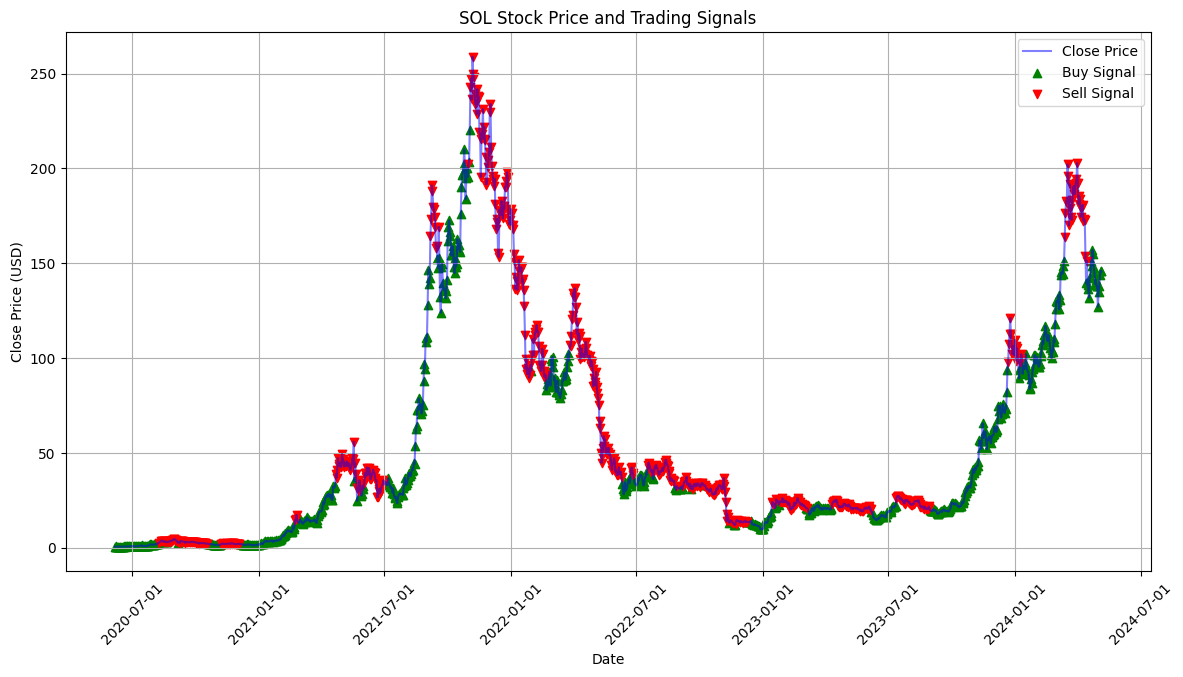

In [12]:
plot_stock_data(df, 'SOL')

## Time Series

Let's try making a time series analysis prediciton model of the Solana crypto currency

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Let's split the data, we are not using scikit learn's train test split because we don't want any data leakage

In [14]:
df.sort_index(inplace=True)

# Select the 'Close' price column
data = df['Close']

# Split the data into training and testing sets (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

Let's perform the Dickey-Fuller test to see if our time series is stationary or not

In [15]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train)

Results of Dickey-Fuller Test:
Test Statistic                   -1.767494
p-value                           0.396715
#Lags Used                       22.000000
Number of Observations Used    1121.000000
Critical Value (1%)              -3.436197
Critical Value (5%)              -2.864122
Critical Value (10%)             -2.568145
dtype: float64


This calculates the difference between each data point and its predecessor in the train series. Differencing is a common technique used to remove trends and stabilize the mean of a time series. Specifically, it transforms a non-stationary series into a stationary one by subtracting the previous observation from the current observation.

In [16]:
#Stabalizing the mean
train_diff = train.diff().dropna()
test_stationarity(train_diff)

Results of Dickey-Fuller Test:
Test Statistic                   -5.461599
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1119.000000
Critical Value (1%)              -3.436207
Critical Value (5%)              -2.864126
Critical Value (10%)             -2.568147
dtype: float64


Let's plot the autocorrelation graph

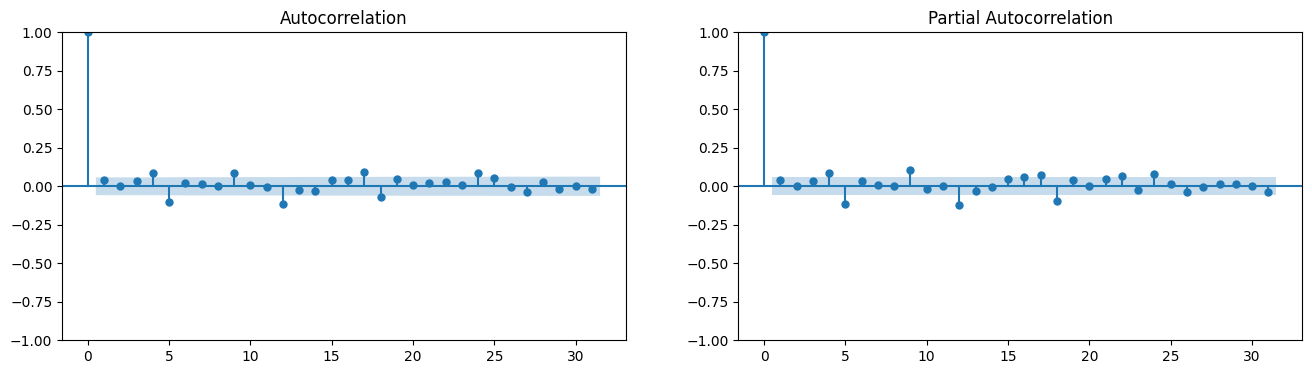

In [17]:
#plotting the autocorrelation function
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train_diff, ax=axes[0])
plot_pacf(train_diff, ax=axes[1])
plt.show()

In [23]:
#fitting the time series
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1144
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -3295.002
Date:                Wed, 05 Jun 2024   AIC                           6604.004
Time:                        20:17:36   BIC                           6639.294
Sample:                             0   HQIC                          6617.330
                               - 1144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1499      0.130     -1.149      0.250      -0.406       0.106
ar.L2          0.0091      0.014      0.658      0.510      -0.018       0.036
ar.L3          0.0294      0.015      1.981      0.0

Let's plot our forecast and see our mean squared error

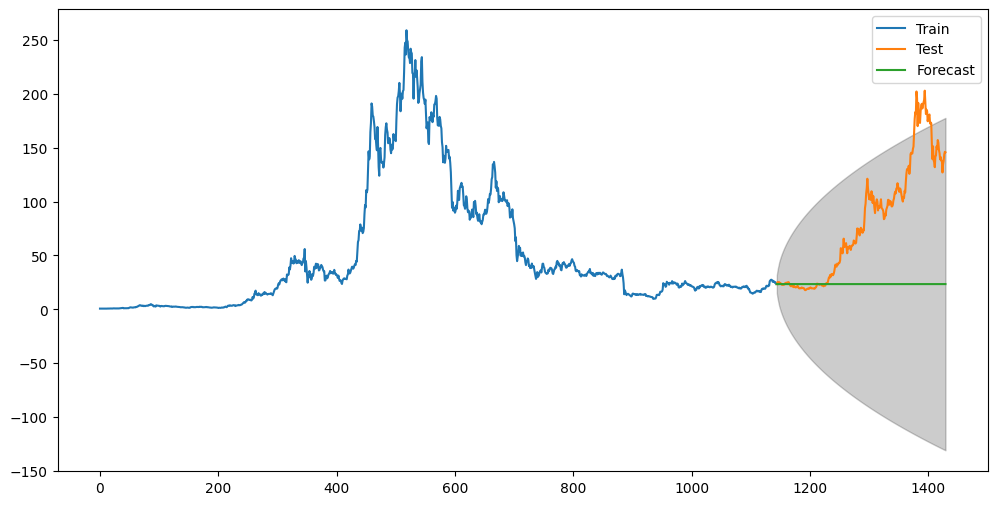

Test MSE: 6251.071183093944


In [24]:
#plotting the time series, and forecast preidciton
forecast_steps = len(test)
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the forecast with the confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)
print(f'Test MSE: {mse}')

Clearly we see that it did not forecast anything that well

## LSTM

Let's try and create a neural network, specifically a LSTM (Long Short Term Memory Model)

In [81]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np

Let's normalize label encode the values

In [82]:
#Normalizing the function 
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

Creating sequences because the LSTM needs a n sequence amount for how many time steps to look back for each sample

In [83]:
#function to create sequences
def create_sequences(data, labels, seq_length):
    sequences = []
    labels_seq = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels_seq.append(labels[i + seq_length])
    return np.array(sequences), np.array(labels_seq)

In [84]:
#transforming the code into sequences for the LSTM model
seq_length = 28
X, y = create_sequences(scaled_features, df['Label'].values, seq_length)

Splitting the data again this way to avoid data leakage

In [85]:
#To prevent data leakage
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Let's build a LSTM model with multiple layers with BatchNormalization so that it normalizes the outputs of each LSTM layer for faster training and more accurate predictions

In [86]:
model = Sequential()

model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Second LSTM layer
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Third LSTM layer
model.add(LSTM(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Dense layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
num_classes = len(np.unique(y))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Dasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split=0.2)

Epoch 1/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.5199 - loss: 0.9561 - val_accuracy: 0.5244 - val_loss: 0.6919
Epoch 2/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5952 - loss: 0.7989 - val_accuracy: 0.5244 - val_loss: 0.6925
Epoch 3/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6024 - loss: 0.7774 - val_accuracy: 0.5244 - val_loss: 0.6942
Epoch 4/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6050 - loss: 0.7516 - val_accuracy: 0.5244 - val_loss: 0.6952
Epoch 5/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6194 - loss: 0.7150 - val_accuracy: 0.5244 - val_loss: 0.6957
Epoch 6/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6387 - loss: 0.6657 - val_accuracy: 0.5244 - val_loss: 0.6949
Epoch 7/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6456 - loss: 0.6574 - val_accuracy: 0.5244 - val_loss: 0.6955
Epoch 8/2000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6426 - loss: 0.6348 - val_accu

In [88]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5277 - loss: 2.2751
Test Accuracy: 47.69%


Let's print the loss/accuracy for each epoch for the training and validation set

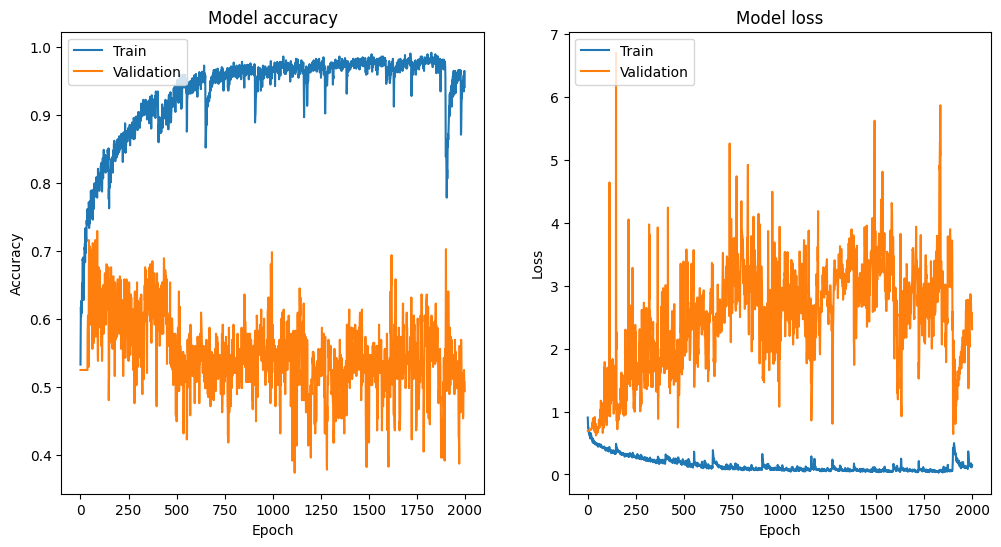

In [89]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

As we can see here within the graphs, the accuracy oscilates between 70% and 50% accuracy for prediciting when to buy and when to sell at the 0 - 500 epoch range. We also see that the loss for the training continously is decreasing as the epochs continue to grow. This is a good sign meaning that our model is converging well. However, as the epochs increase, the accuracy actually is starting to decrease and reduce the range of oscilations. Maybe it would be better to have it trained at around 250 - 500 epochs

Given that the range accuracy is above 50% at certain points, one could deduce that this would be a profitable modle given trained at the right epochs, meaning if I were to use this to predict when to buy and sell Solana I would be profitable and could potentially make infinite amout of money... Just theorizing hahaha